# Image Compression - FFT

In [2]:
import numpy as np
import cv2
import os
import pandas as pd
from matplotlib.image import imread
import matplotlib.image as image
from matplotlib import pyplot as plt
from scipy.fftpack import dct
from scipy.fft import fft, ifft
import math


####TASK 1 --- Divide into 8 by 8 blocks, which is what jpeg used.

The Shape of the image is: 471 640


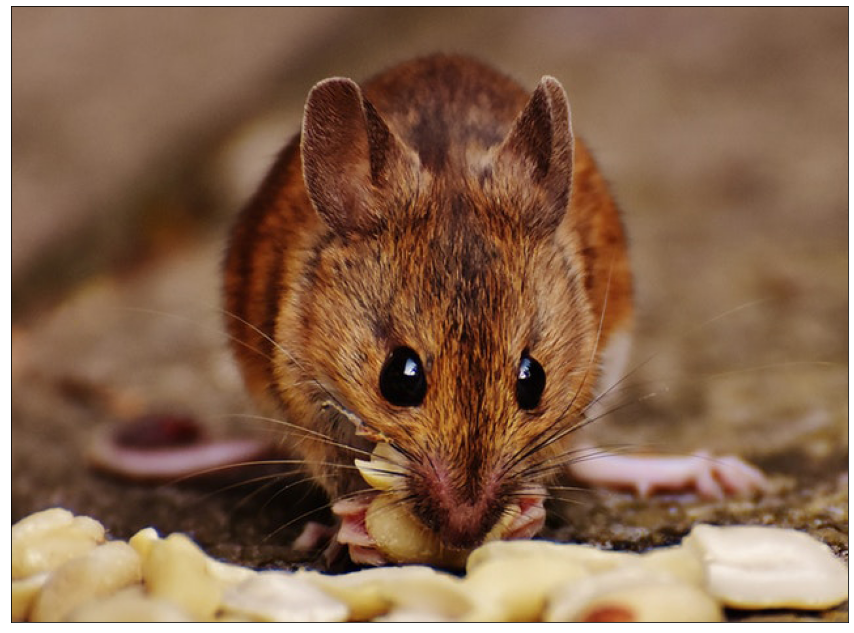

In [3]:
# # Using cv2.imread() method
# img = cv2.imread('Images\jpeg-home.jpg',0)
# # or
A = imread(os.path.join('Images','mouse.jpg'))
img = np.mean(A,-1); # average RGB to grey scale 

# height width and channel
height, width = img.shape[:2];print('The Shape of the image is:',height, width)

# # Displaying the image
plt.figure(figsize=(15,15))
plt.imshow(A, cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

# plt.imsave('gray.jpg', img, cmap='gray')

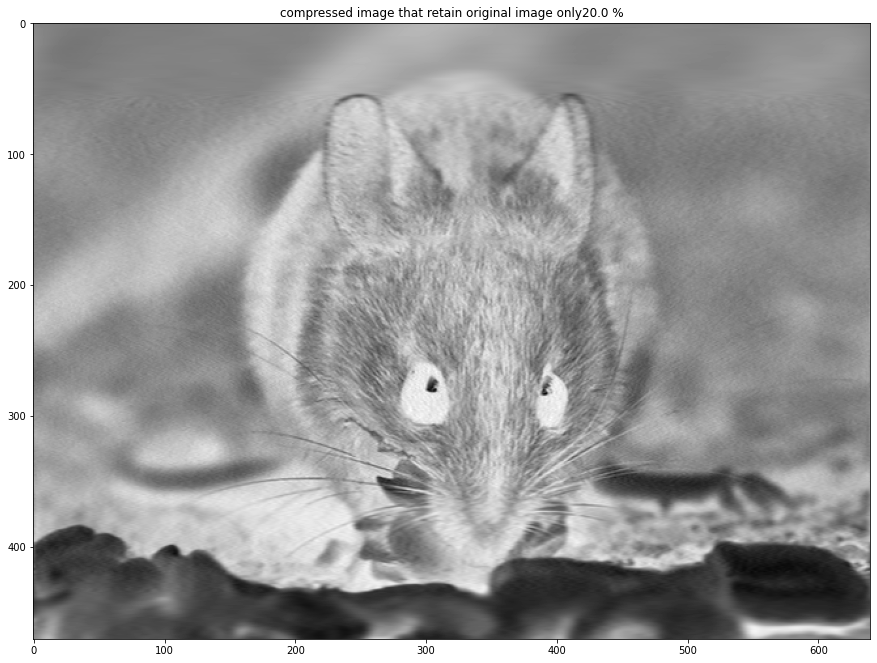

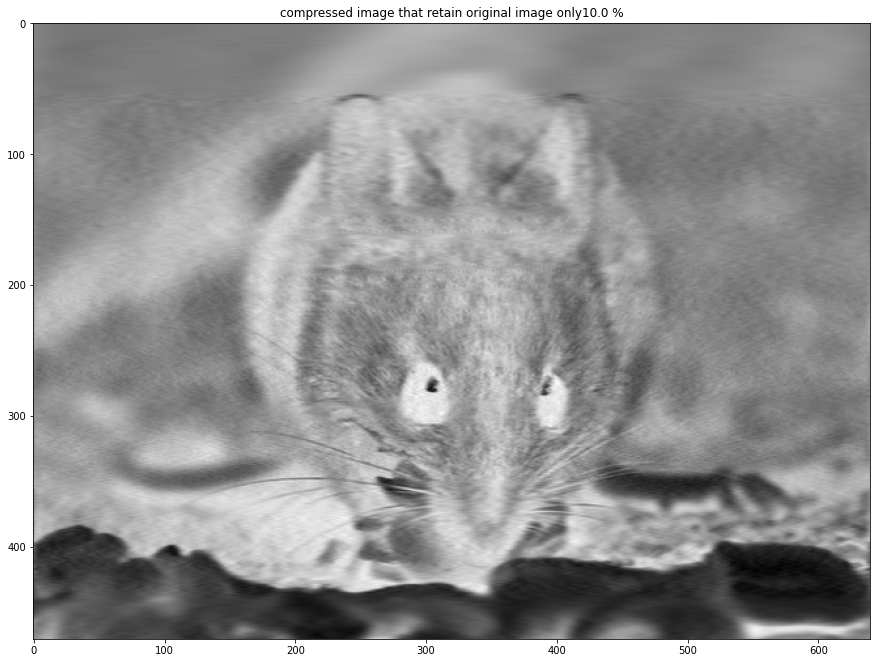

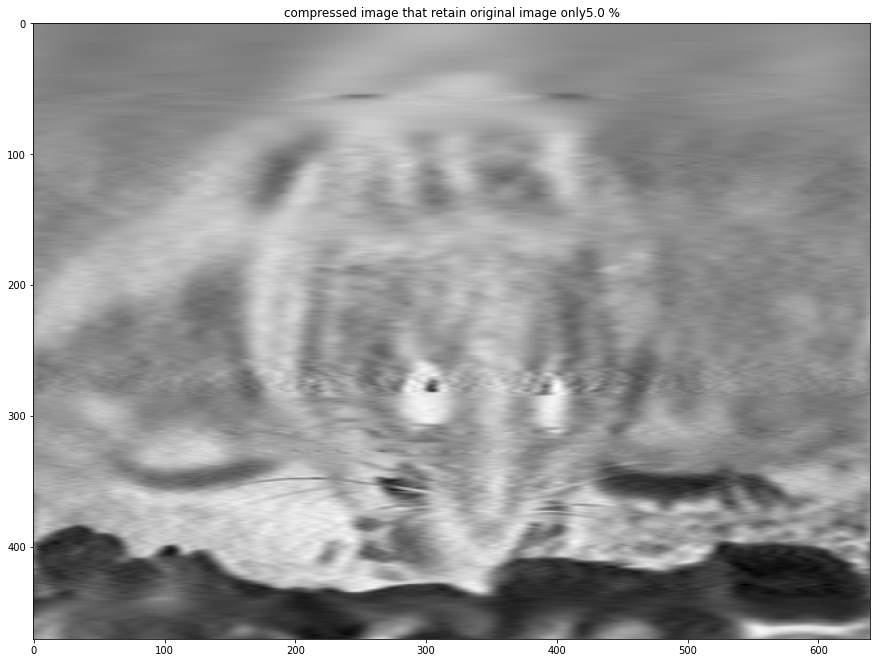

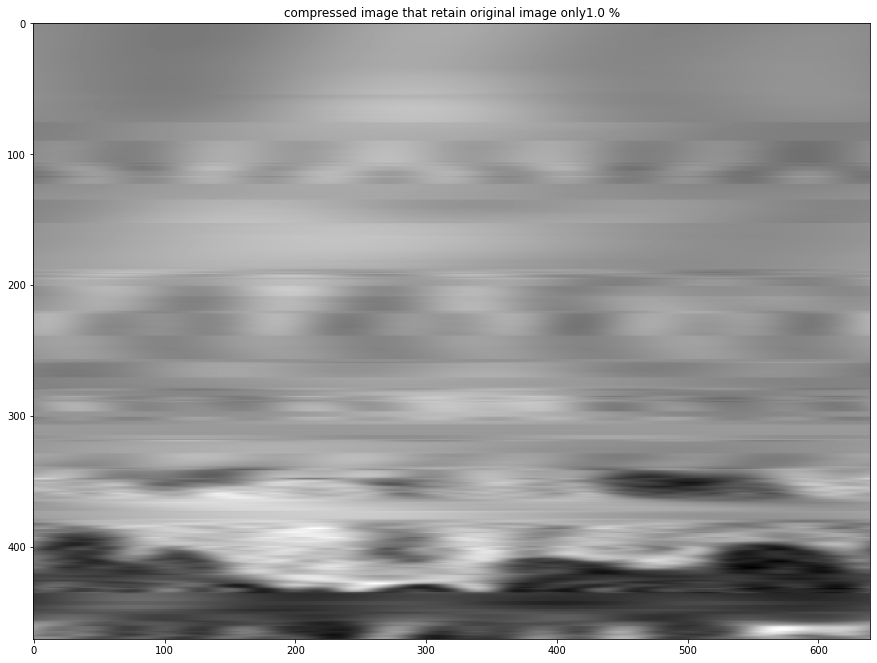

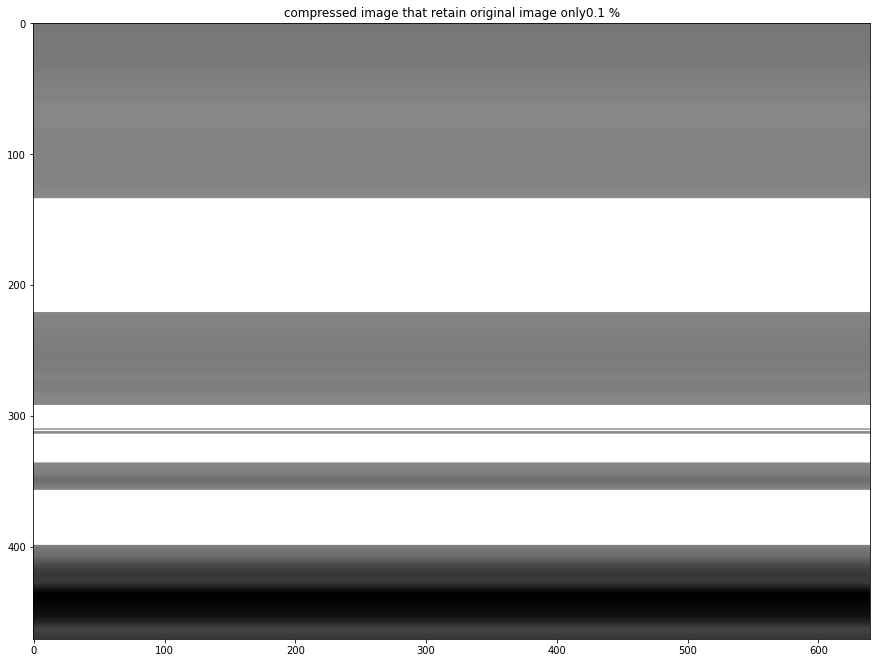

In [4]:
# Apply FFT2
img_fft2 = fft(img)
# Apply orders
img_fft2_sorted = np.sort(np.abs(img_fft2.reshape(-1)))


atthisvalue = img_fft2_sorted[int(np.floor((1-0.01)*len(img_fft2_sorted)))]
index = np.abs(img_fft2)>atthisvalue
extra = img_fft2*index


for threshold in (0.2, 0.1, 0.05,0.01,0.001):
    atthisvalue = img_fft2_sorted[int(np.floor((1-threshold)*len(img_fft2_sorted)))]    #find the therohold value
    index = np.abs(img_fft2)>atthisvalue                                                #return index list
    obtain = img_fft2 * index                                                           #zero out
    # reverse back to original real image
    real_img = ifft(obtain).real
    # plot out
    plt.figure(figsize=(15,15))
    plt.imshow(256-real_img,cmap='gray')
    plt.title('compressed image that retain original image only'+ str(threshold*100) + ' %')

